# Regularization

Part l: Understanding Regularization

1. What is regularization in the context of deep learning? Why is it important?

- Regularization in deep learning is a technique used to prevent overfitting by adding a penalty term to the loss function, which discourages the model from learning overly complex patterns in the training data.
- It is important because deep neural networks are highly flexible models capable of fitting complex patterns in data, but this flexibility also makes them prone to overfitting, where they memorize noise in the training data rather than learning the underlying patterns.

 Regularization helps in constraining the model's capacity to prevent overfitting and improve generalization to unseen data.

2. Explain the bias-variance tradeoff and how regularization helps in addressing this tradeoff.

- The bias-variance tradeoff refers to the balance between bias (error due to overly simplistic assumptions) and variance (error due to excessive complexity) in machine learning models.
- Models with high bias may underfit the training data, while models with high variance may overfit the training data.
- Regularization helps address this tradeoff by penalizing overly complex models, reducing their variance at the cost of a slight increase in bias. This regularization penalty discourages the model from fitting noise in the training data and encourages it to learn more generalizable patterns.

3. Describe the concept of L1 and L2 regularization. How do they differ in terms of penalty calculation and their effects on the model?

- **L1 regularization:** Also known as Lasso regularization, adds the absolute value of the coefficients as a penalty term to the loss function. It encourages sparsity in the model by shrinking less important features' coefficients to zero.
- **L2 regularization:** Also known as Ridge regularization, adds the squared magnitude of the coefficients as a penalty term to the loss function. It penalizes large coefficients, effectively spreading out the weight values more evenly across all features.
- L1 regularization tends to produce sparse models, eliminating some features altogether, while L2 regularization penalizes large weights more uniformly, often resulting in smaller but non-zero coefficients for all features.

4. Discuss the role of regularization in preventing overfitting and improving the generalization of deep learning models.

- Regularization prevents overfitting by adding a penalty term to the loss function, discouraging overly complex models that fit noise in the training data.
- By constraining the model's capacity and reducing its ability to memorize the training data, regularization helps improve the model's ability to generalize to unseen data.
- Regularization techniques like L1 and L2 regularization, along with dropout and early stopping, are commonly used in deep learning to prevent overfitting and improve the generalization performance of models.

Part 2: Regularization Technique

5. Explain Dropout regularization and how it works to reduce overfitting. Discuss the impact of Dropout on model training and inference.

- Dropout regularization is a technique where randomly selected neurons are ignored during training with a certain probability.
- During training, each neuron has a probability p of being temporarily "dropped out" or omitted from the network, effectively removing it from the network for that iteration.
- This forces the network to learn more robust features and prevents neurons from co-adapting to specific features, reducing the risk of overfitting.
- Dropout has a regularizing effect on the model by reducing the reliance on specific neurons, leading to better generalization performance.
- During inference, the entire network is used, but the weights of the neurons are scaled by the dropout probability to maintain the expected output magnitude, ensuring consistency between training and inference.

6. Describe the concept of Early Stopping as a form of regularization. How does it help prevent overfitting during the training process?

- Early stopping is a form of regularization where the training process is stopped prematurely when the performance of the model on a validation dataset starts to deteriorate.
- It involves monitoring the performance metric (e.g., validation loss or accuracy) on a separate validation dataset during training.
- Training is halted when the performance metric stops improving or starts to degrade, indicating that the model is overfitting the training data.
- By stopping training at the right time, early stopping prevents the model from continuing to learn noise in the training data and helps achieve better generalization performance on unseen data.

7. Explain the concept of Batch Normalization and its role as a form of regularization. How does Batch Normalization help in preventing overfitting?

- Batch Normalization is a technique used to standardize the inputs of each layer in a neural network by normalizing the activations.
- It helps in preventing overfitting by reducing internal covariate shift, which refers to the change in the distribution of the inputs to each layer during training.
- By normalizing the inputs, Batch Normalization stabilizes the training process, allowing the use of higher learning rates and accelerating convergence.
- Additionally, Batch Normalization acts as a form of regularization by adding noise to the training process, similar to dropout, which helps prevent the model from overfitting to the training data.

Part 3: Applying  Regularization

8. Implement Dropout regularization in a deep learning model using a framework of your choice. Evaluate
its impact on model performance and compare it with a model without Dropout?

170498071/170498071 [==============================] - 4s 0us/step


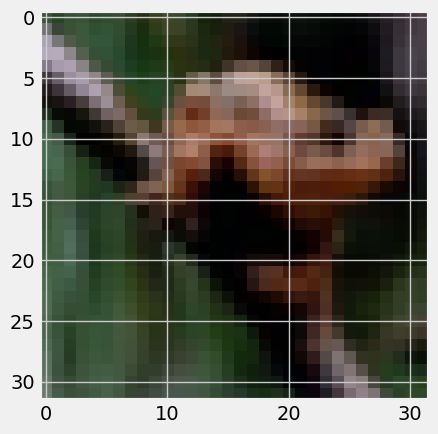

In [1]:
# importing neccessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import os
plt.style.use('fivethirtyeight')

## loading the dataset
(X_train_full, y_train_full),(X_test,y_test)=tf.keras.datasets.cifar10.load_data()

## Scaling the data
X_train_full=X_train_full/255.0
X_test=X_test/255.0

## validation and train split
X_valid, X_train=X_train_full[:5000],X_train_full[5000:]
y_valid, y_train=y_train_full[:5000],y_train_full[5000:]

## Visualizing
plt.imshow(X_train[0],cmap='binary')
plt.show()

In [2]:
## without Dropout
LAYERS=[tf.keras.layers.Flatten(input_shape=[32,32,3],name="inputlayer"),
        tf.keras.layers.Dense(500,kernel_initializer='he_normal',name="hiddenlayer1"),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dense(100,kernel_initializer='he_normal',name="hiddenlayer2"),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

model=tf.keras.models.Sequential(LAYERS)

## Compiling the model
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics='accuracy')

model.summary()

history=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

res1=pd.DataFrame(data=history.history)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 3072)              0         
                                                                 
 hiddenlayer1 (Dense)        (None, 500)               1536500   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 500)               0         
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               50100     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 100)               0         
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 1587610 (6.06 MB)
Trainable params: 158761

In [3]:
## with Dropout
LAYERS=[tf.keras.layers.Flatten(input_shape=[32,32,3],name="inputlayer"),
        tf.keras.layers.Dense(500,kernel_initializer='he_normal',name="hiddenlayer1"),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.20),
        tf.keras.layers.Dense(100,kernel_initializer='he_normal',name="hiddenlayer2"),
        tf.keras.layers.LeakyReLU(),
        tf.keras.layers.Dropout(0.10),
        tf.keras.layers.Dense(10,activation='softmax',name="outputlayer")]

model1=tf.keras.models.Sequential(LAYERS)

## Compiling the model
model1.compile(loss='sparse_categorical_crossentropy',
              optimizer=tf.keras.optimizers.SGD(learning_rate=1e-3),
              metrics='accuracy')

model1.summary()

history1=model.fit(X_train,y_train, epochs=10,validation_data=(X_valid,y_valid))

res2=pd.DataFrame(data=history1.history)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 3072)              0         
                                                                 
 hiddenlayer1 (Dense)        (None, 500)               1536500   
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 500)               0         
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               50100     
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 100)               0         
                                                                 
 dropout_1 (Dropout)         (None, 100)              

<Figure size 1500x1200 with 0 Axes>

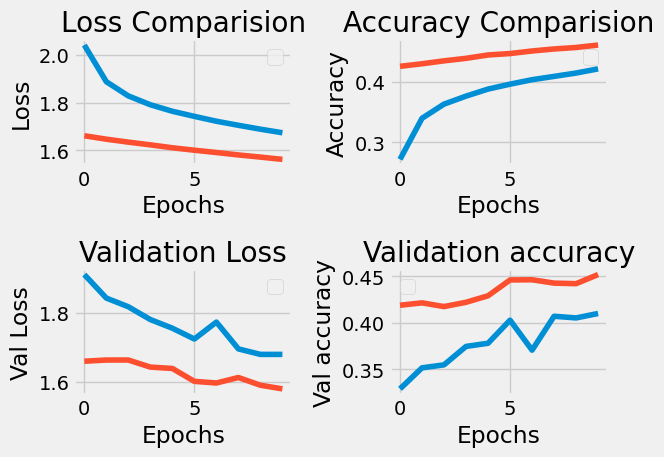

In [33]:
## It's time to compare the results
plt.figure(figsize=(15,12))
plt.subplots(2,2)

plt.subplot(2,2,1)
plt.plot(pd.concat([res1['loss'],res2['loss']],axis=1))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Comparision")
plt.legend()

plt.subplot(2,2,2)
plt.plot(pd.concat([res1['accuracy'],res2['accuracy']],axis=1))
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy Comparision")
plt.legend()

plt.subplot(2,2,3)
plt.plot(pd.concat([res1['val_loss'],res2['val_loss']],axis=1))
plt.xlabel("Epochs")
plt.ylabel("Val Loss")
plt.title("Validation Loss")
plt.legend()

plt.subplot(2,2,4)
plt.plot(pd.concat([res1['val_accuracy'],res2['val_accuracy']],axis=1))
plt.xlabel("Epochs")
plt.ylabel("Val accuracy")
plt.title("Validation accuracy")
plt.legend()
plt.tight_layout()

plt.show()


### 9. Discuss the considerations and tradeoffs when choosing the appropriate regularization technique for a given deep learning task.

When choosing a regularization technique for a deep learning task, consider:

1. **Data and Task Complexity:** Tailor the technique to match the data complexity and task requirements.

2. **Model Architecture:** Select techniques that align with the neural network architecture.

3. **Interpretability vs. Performance:** Balance between model interpretability and performance.

4. **Computational Complexity:** Be mindful of the additional computational overhead introduced by some techniques.

5. **Robustness to Hyperparameters:** Choose techniques with fewer hyperparameters or less sensitivity to their values.

6. **Impact on Convergence and Generalization:** Ensure the technique strikes a balance between preventing overfitting and improving generalization.

7. **Training Data Size:** Consider the size of the training dataset and adjust the regularization strength accordingly.

8. **Domain-Specific Considerations:** Factor in domain-specific knowledge and insights about the data and task.

In short, we must select a regularization technique that best fits the specific requirements of your deep learning task while considering trade-offs between interpretability, performance, computational complexity, and domain-specific considerations.

## The End